In [1]:
# Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import camb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

/home/andrewcats/anaconda3/envs/conda_andrea_g/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


GetDist Version: 1.5.4, Matplotlib version: 3.9.2


In [2]:
# Loading samples
#w0wacdm: ACT, PLANCK, DESIDR2, DESY5
samples_w0wa = getdist.mcsamples.loadMCSamples(file_root=os.path.join('/home/andrewcats/tesi_magistrale/w0wacdm/w0wacdm_act', 'w0wacdm'), settings={'ignore_rows':0.3})
#print('Parameters: ', samples.paramNames.names)
param_names_w0wa = [param.name for param in samples_w0wa.paramNames.names]
print(param_names_w0wa)

#lcdm: ACT, PLANCK, DESIDR2, DESY5
samples_lcdm_act = getdist.mcsamples.loadMCSamples(file_root=os.path.join('/home/andrewcats/tesi_magistrale/lcdm/all_act', 'lcdm_act'), settings={'ignore_rows':0.3})
#print('Parameters: ', samples.paramNames.names)
param_names_lcdm_act = [param.name for param in samples_lcdm_act.paramNames.names]
print(param_names_lcdm_act)

#lcdmact_desidr2: ACT, PLANCK, DESIDR2
samples_act_desidr2 = getdist.mcsamples.loadMCSamples(file_root=os.path.join('/home/andrewcats/tesi_magistrale/lcdm/act_desidr2', 'act_desidr2'), settings={'ignore_rows':0.3})
#print('Parameters: ', samples.paramNames.names)
param_names_act_desidr2 = [param.name for param in samples_act_desidr2.paramNames.names]
print(param_names_act_desidr2)

#lcdm_act: ACT, PLANCK
samples_act = getdist.mcsamples.loadMCSamples(file_root=os.path.join('/home/andrewcats/tesi_magistrale/lcdm/act', 'act'), settings={'ignore_rows':0.3})
#print('Parameters: ', samples_act.paramNames.names)
param_names_act = [param.name for param in samples_act.paramNames.names]
print(param_names_act)

#lcdm_desy5: DESY5
samples_des = getdist.mcsamples.loadMCSamples(file_root=os.path.join('/home/andrewcats/tesi_magistrale/lcdm/supernovae_des', 'supernovae_des'), settings={'ignore_rows':0.3})
#print('Parameters: ', samples.paramNames.names)
param_names_des = [param.name for param in samples_des.paramNames.names]
print(param_names_des)

['logA', 'ns', 'theta_MC_100', 'ombh2', 'omch2', 'w', 'wa', 'tau', 'A_planck', 'A', 'As', 'DHBBN', 'YHe', 'Y_p', 'age', 'clamp', 'H0', 'omegam', 'omegamh2', 'zre', 'sigma8', 's8h5', 's8omegamp5', 's8omegamp25', 'rdrag', 'chi2__BAO', 'chi2__CMB', 'chi2__SN', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__sn.desy5', 'chi2__bao.desi_dr2.desi_bao_all', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE_sroll2', 'chi2__act_dr6_cmbonly.PlanckActCut']
['H0', 'logA', 'ns', 'ombh2', 'omch2', 'tau', 'A_planck', 'A', 'As', 'DHBBN', 'YHe', 'Y_p', 'age', 'clamp', 'omega_de', 'omegam', 'omegamh2', 'rdrag', 's8h5', 'S8_optimal', 's8omegamp25', 's8omegamp5', 'sigma8', 'thetastar', 'zrei', 'chi2__BAO', 'chi2__CMB', 'chi2__SN', 'chi2', 'chi2__sn.desy5', 'chi2__bao.desi_dr2.desi_bao_all', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE_sroll2', 'chi2__act_dr6_cmbonly.PlanckActCut']
['H0', 'logA', 'ns', 'ombh2', 'omch2', 'tau', 'A_planck', 'A', 'As', 'DHBBN', 'YHe', 'Y_p', 'age', 'clamp'

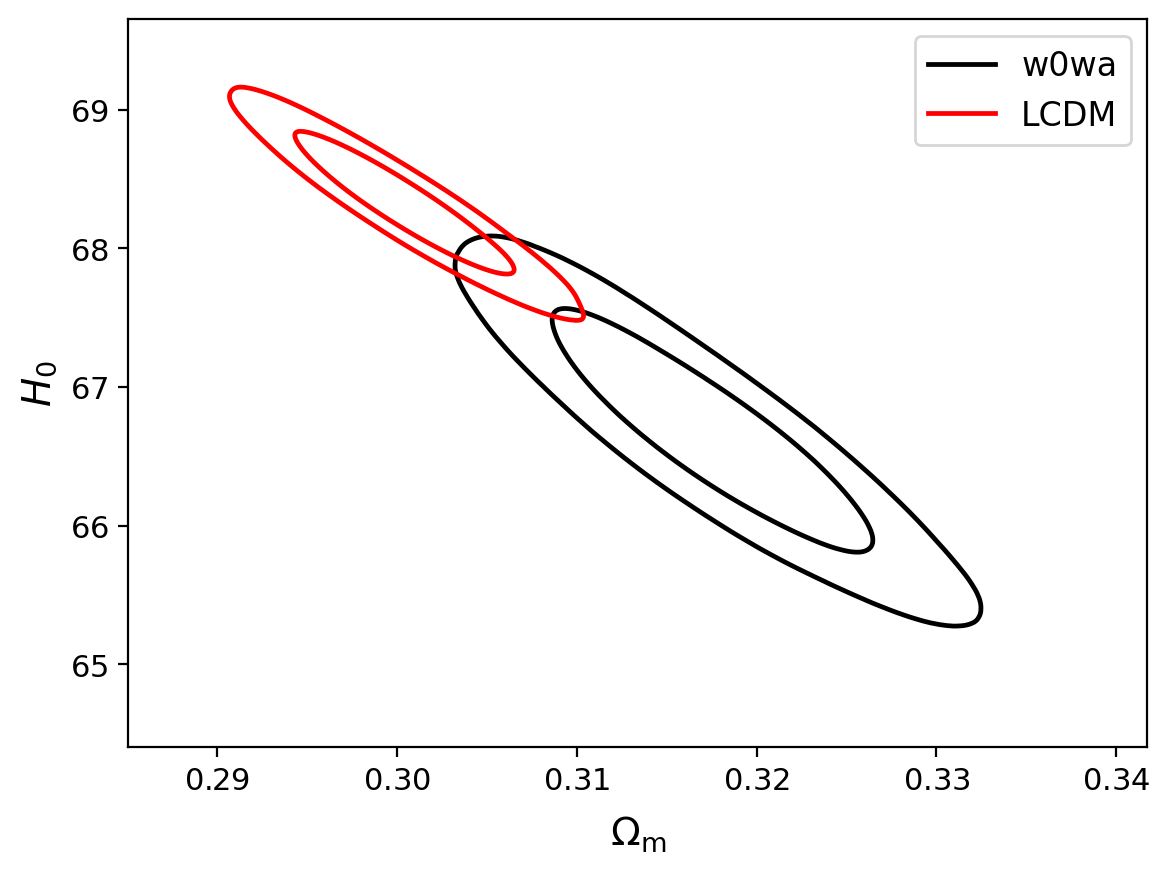

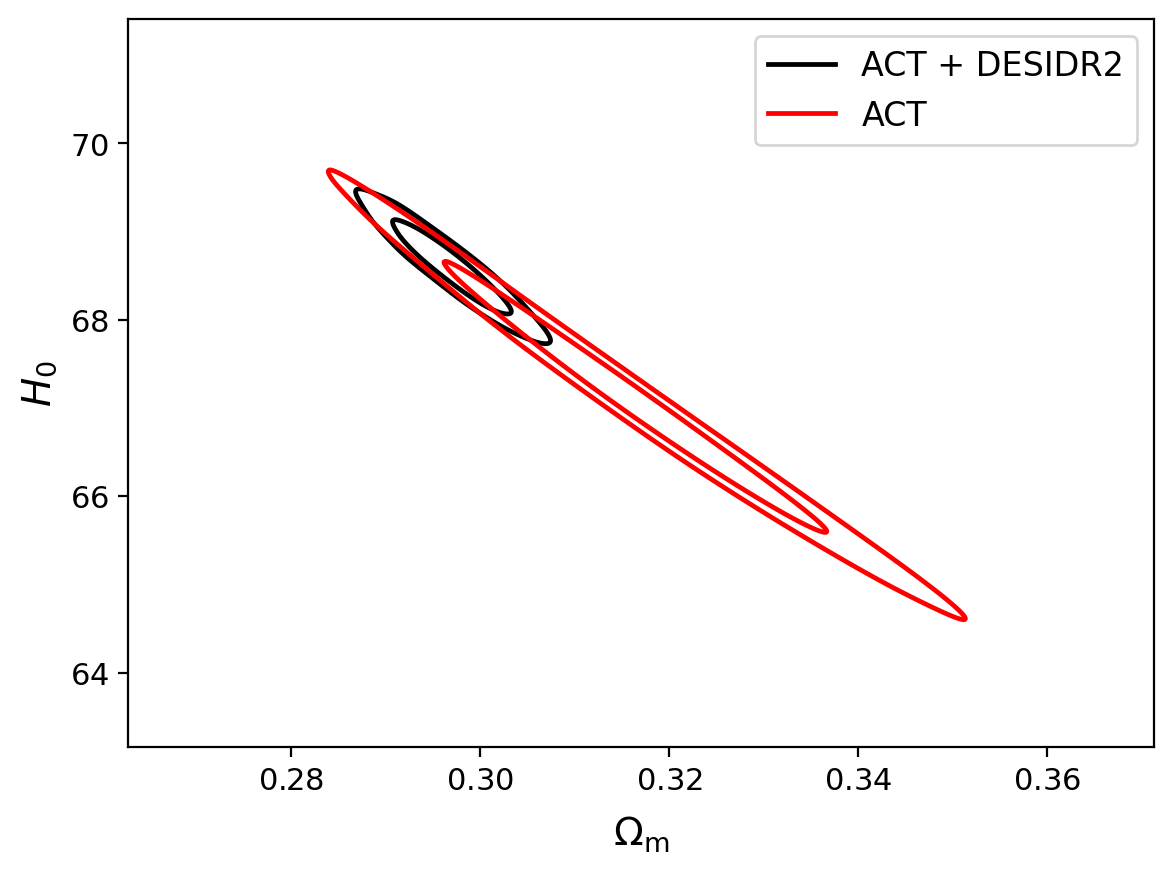

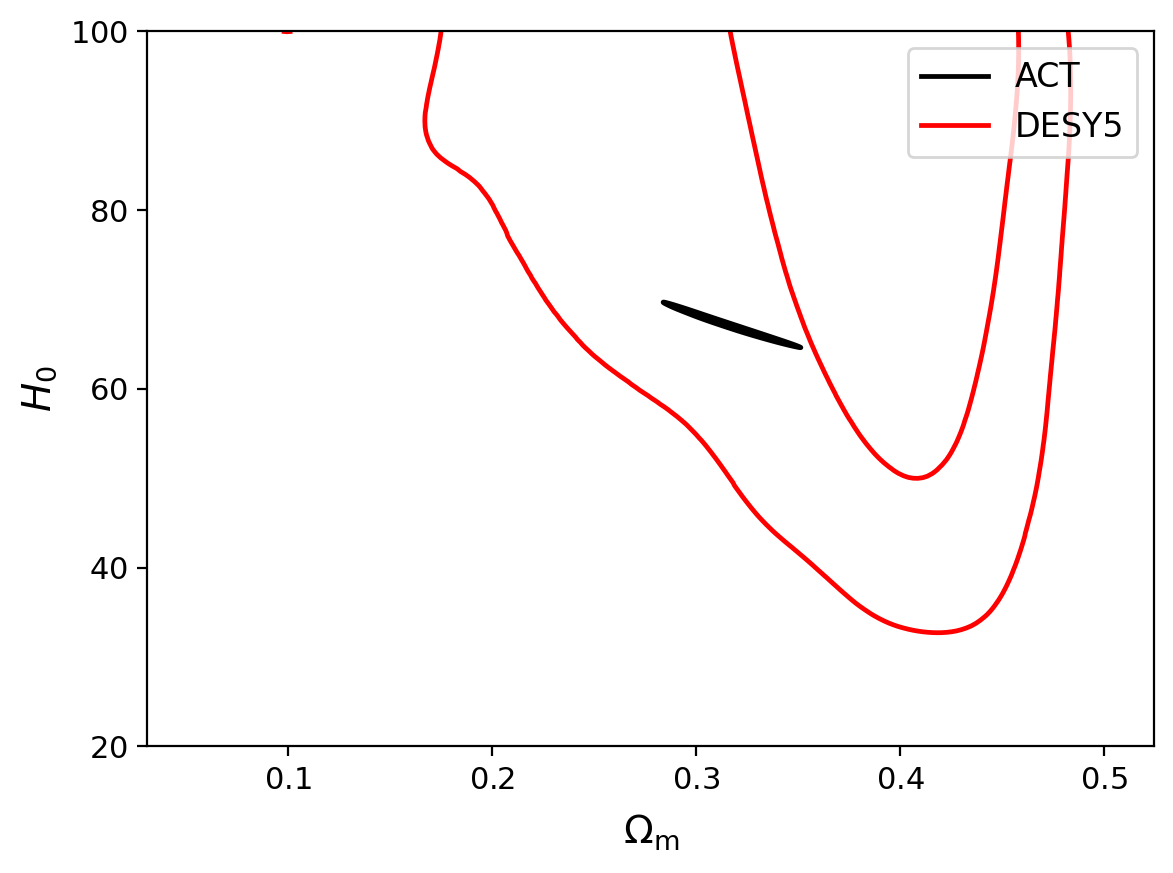

In [3]:
# Comparing two samples in the same plot
# w0wa vs lcdm
samples = [samples_w0wa, samples_lcdm_act]
g = plots.get_single_plotter()
g.plot_2d(samples, ['omegam', 'H0'])
g.add_legend(['w0wa', 'LCDM'])

# act_desidr2 vs act
samples2 = [samples_act_desidr2, samples_act]
g2 = plots.get_single_plotter()
g2.plot_2d(samples2, ['omegam', 'H0'])
g2.add_legend(['ACT + DESIDR2', 'ACT'])

# act vs des
samples3 = [samples_act, samples_des]
g3 = plots.get_single_plotter()
g3.plot_2d(samples3, ['omegam', 'H0'])
g3.add_legend(['ACT', 'DESY5'])

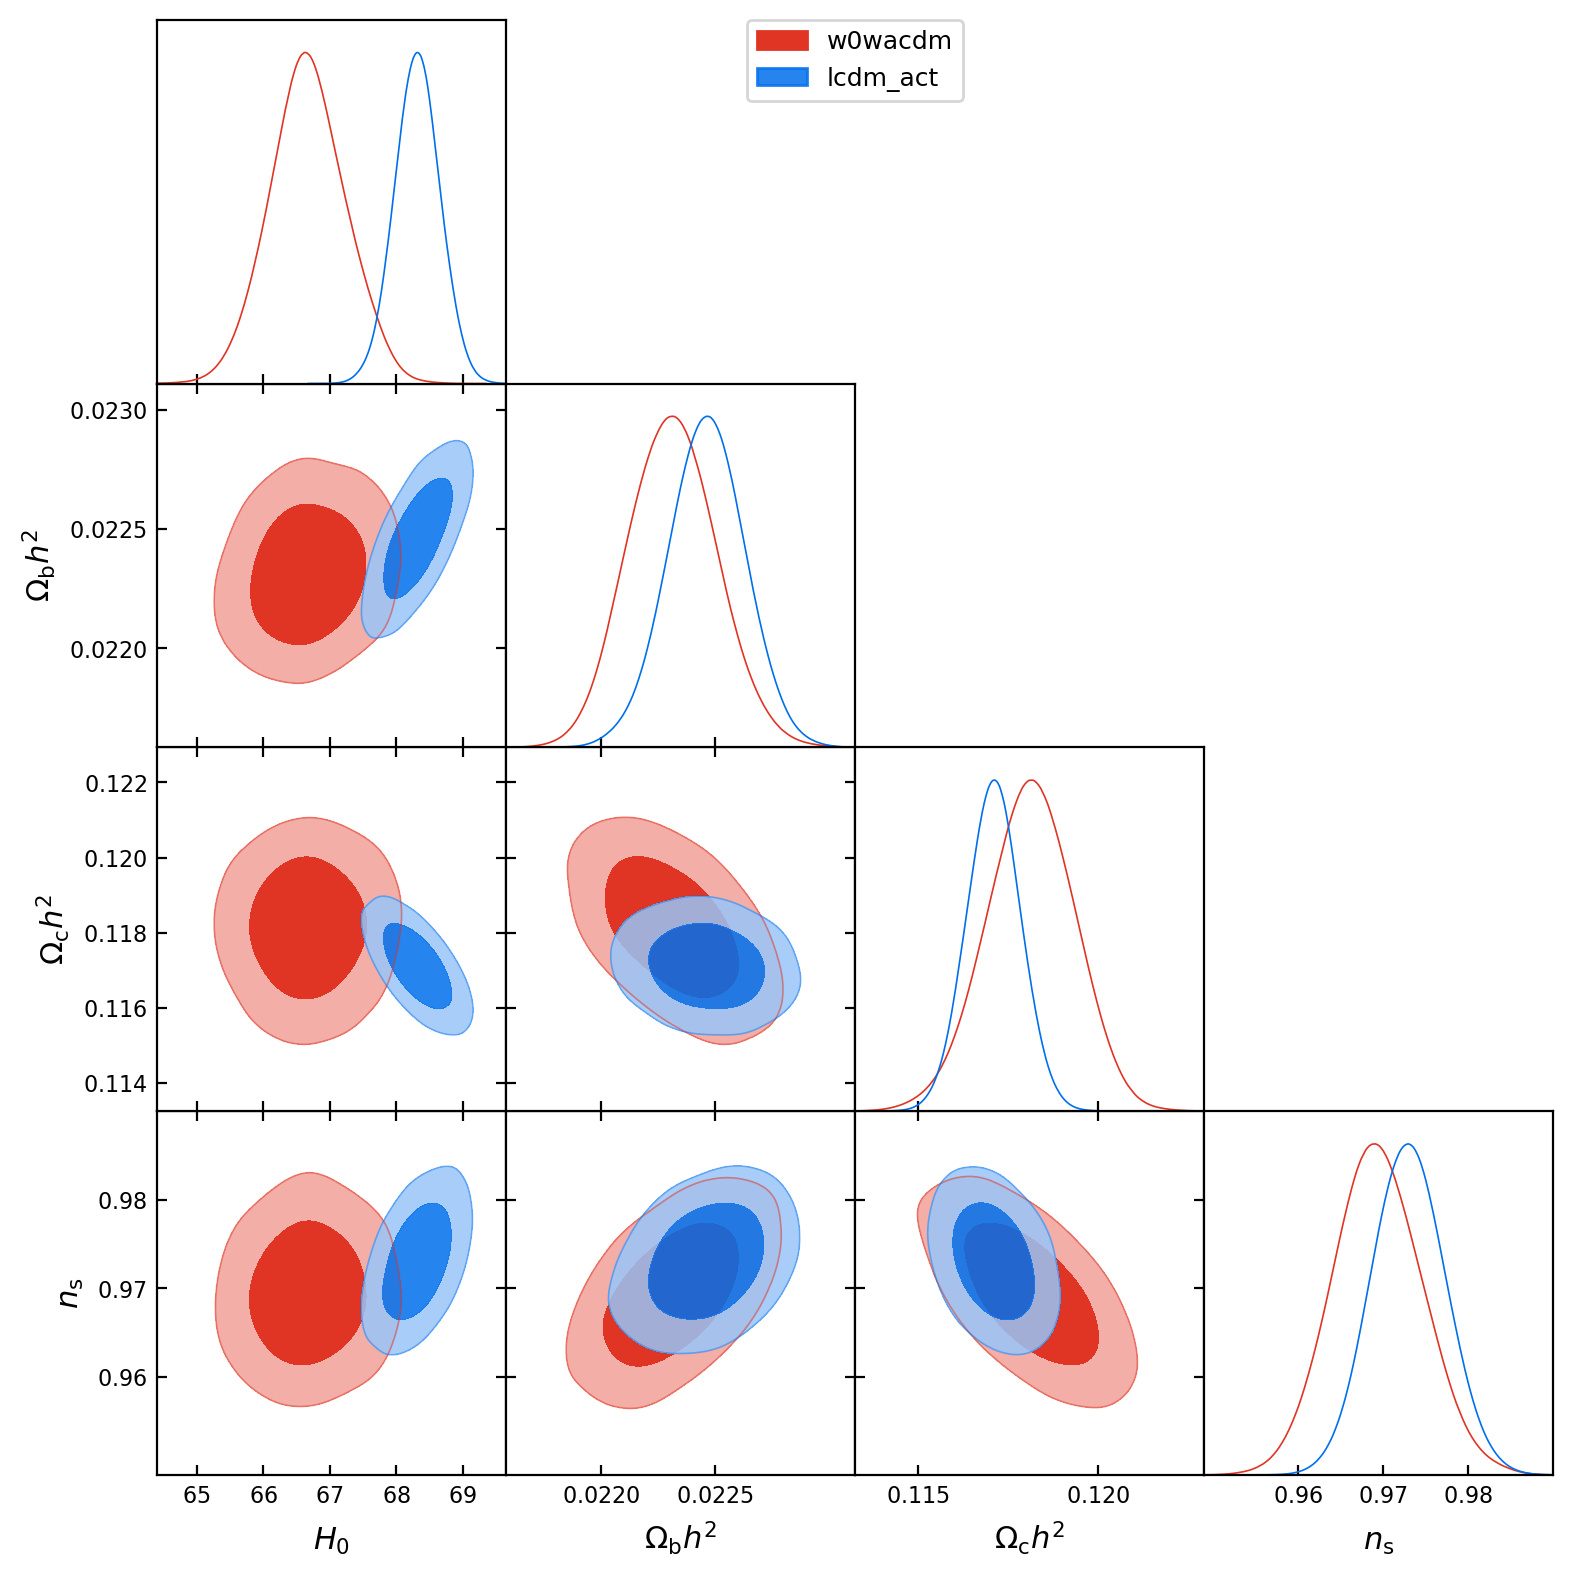

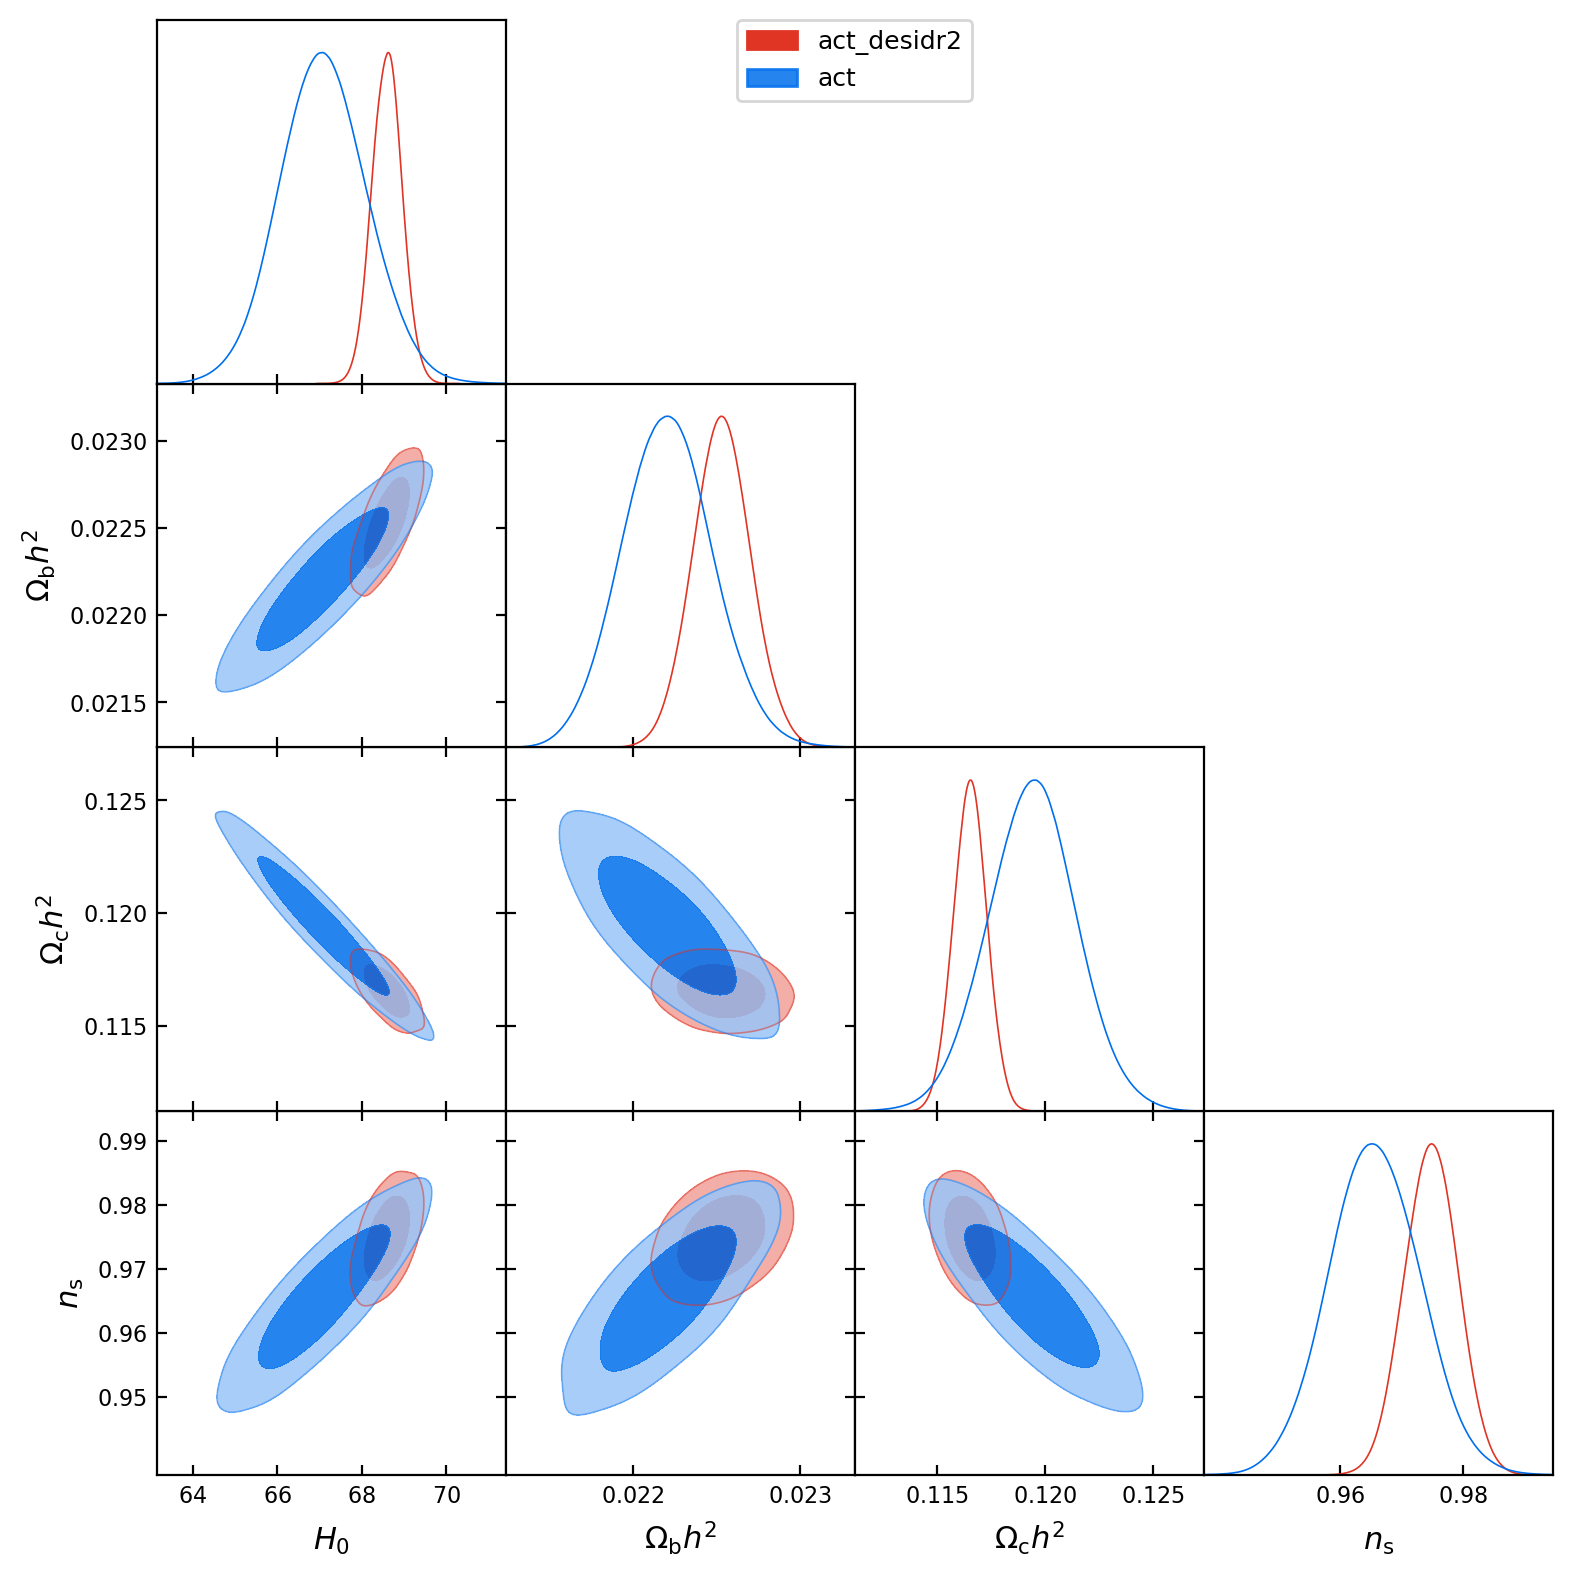

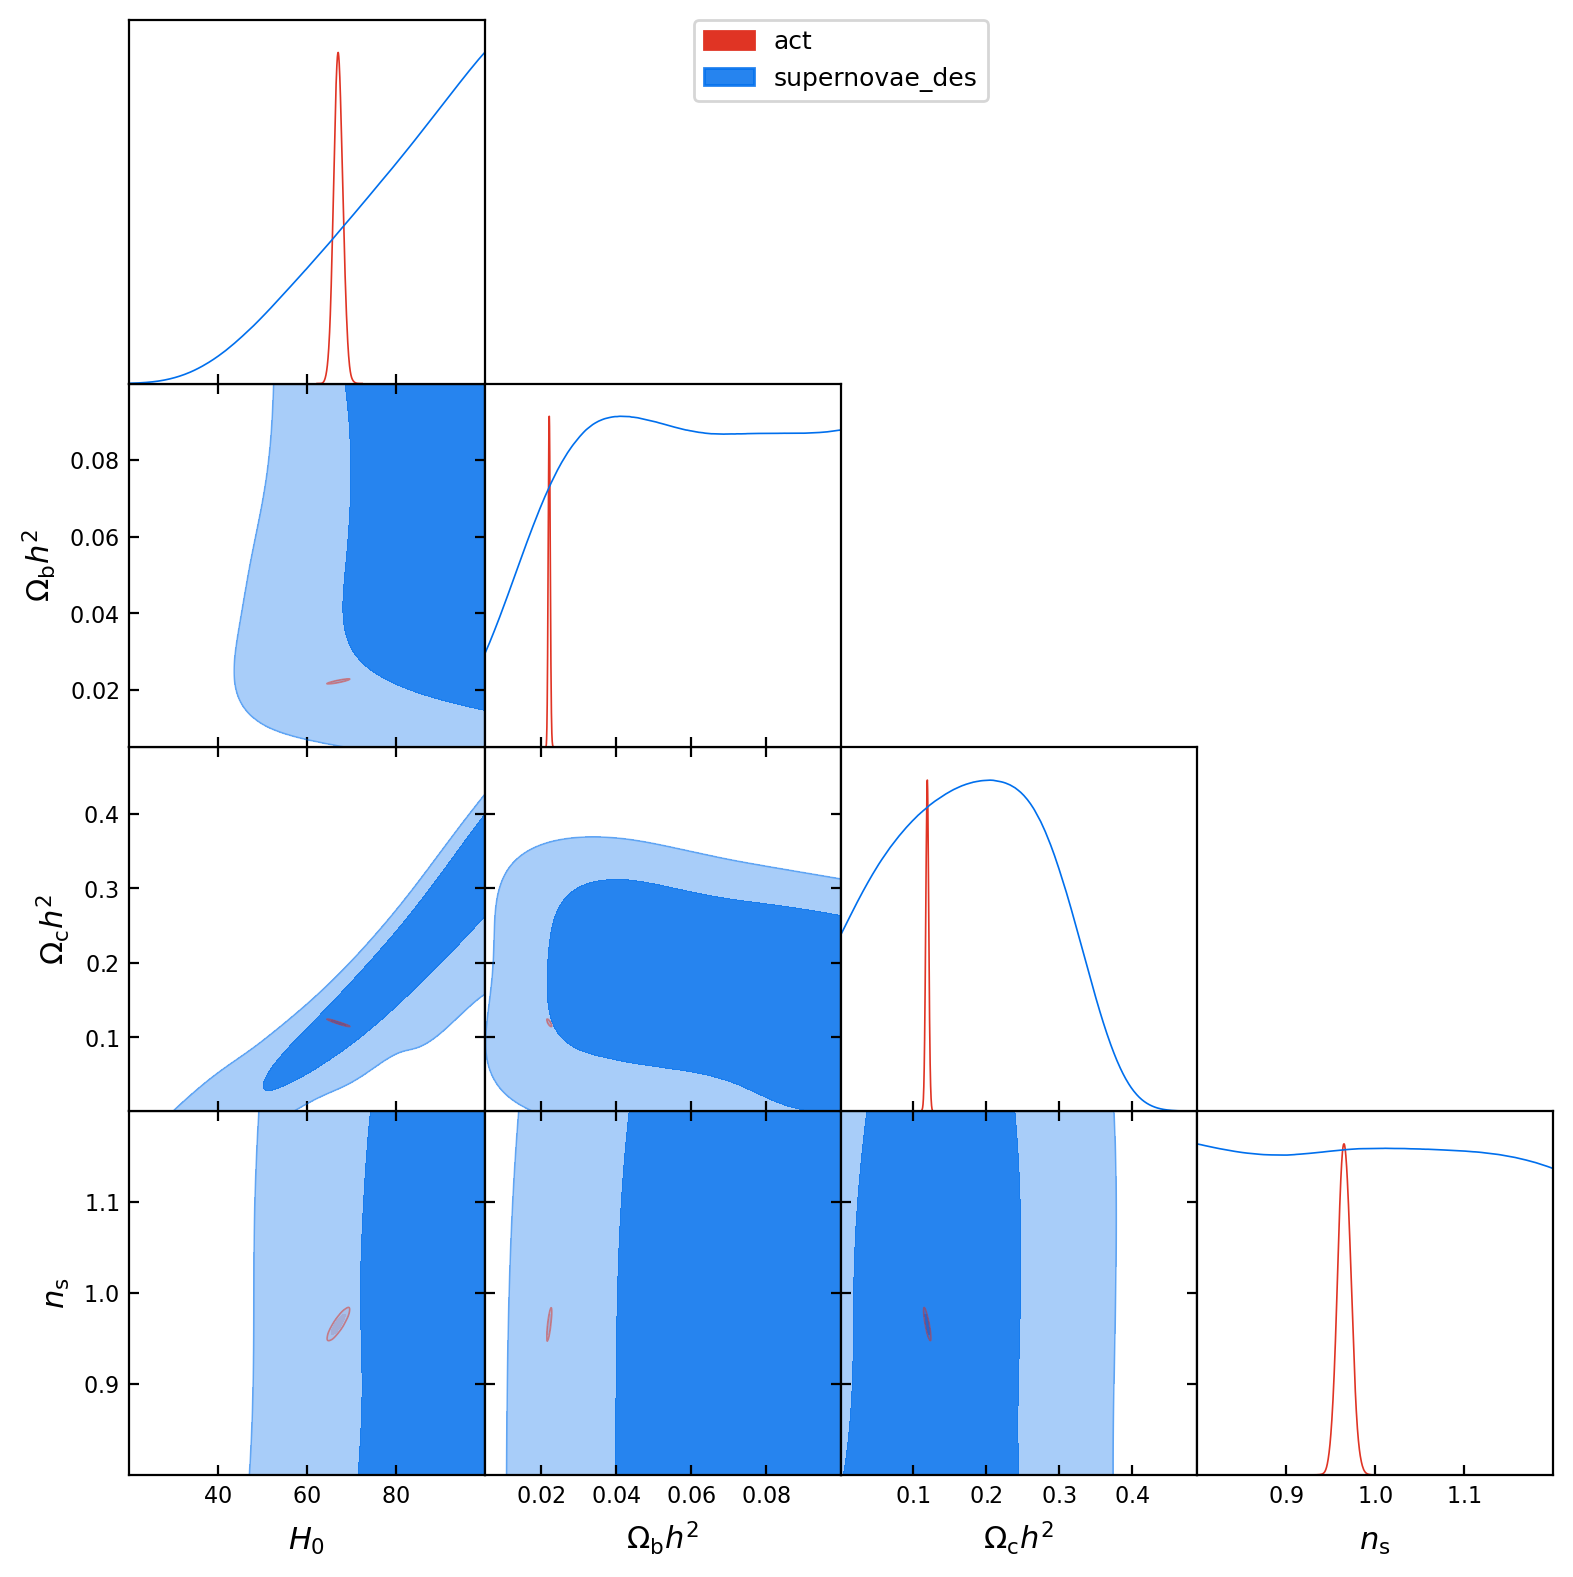

In [4]:
# w0wa vs lcdm
g = plots.get_subplot_plotter()
g.triangle_plot(samples, ['H0', 'ombh2', 'omch2', 'ns'], filled=True)

# act_desidr2 vs act
g2 = plots.get_subplot_plotter()
g2.triangle_plot(samples2, ['H0', 'ombh2', 'omch2', 'ns'], filled=True)

# act vs des
g3 = plots.get_subplot_plotter()
g3.triangle_plot(samples3, ['H0', 'ombh2', 'omch2', 'ns'], filled=True)


In [5]:
# Compute the tensions between the two samples
# Extract means and covariance matrices for the two samples
mean1, cov1 = samples_w0wa.getMeans(), samples_w0wa.cov()
mean2, cov2 = samples_lcdm_act.getMeans(), samples_lcdm_act.cov()

# Select the indices of the parameters to compare (e.g., 'H0' and 'omegam')
param_indices = [samples_w0wa.index['H0'], samples_w0wa.index['omegam']]

# Extract the means and covariances for the selected parameters
mu1 = mean1[param_indices]
mu2 = mean2[param_indices]
cov1 = cov1[np.ix_(param_indices, param_indices)]
cov2 = cov2[np.ix_(param_indices, param_indices)]

# Compute the combined covariance matrix
cov_combined = cov1 + cov2

# Compute the difference in means
delta_mu = mu1 - mu2

# Compute the Gaussian tension (Delta Chi^2)
delta_chi2 = np.dot(delta_mu.T, np.linalg.inv(cov_combined).dot(delta_mu))

# Convert to sigma
tension_sigma = np.sqrt(delta_chi2)

print(f"Gaussian tension between the two samples: {tension_sigma:.2f} sigma")

Gaussian tension between the two samples: 579.99 sigma


DISTANCES

In [6]:
# Read file with DESI data
# Measurements of distances
df_val = pd.read_csv(
    "/home/andrewcats/tesi_magistrale/desi_dr2_points/desi_gaussian_bao_ALL_GCcomb_mean.txt",
    sep='\s+',
    header=None,
    names=["z", "value", "quantity"],
    comment='#'
)

#print(df_val.head())

# Matrix of covariance
df_err = pd.read_csv(
    "/home/andrewcats/tesi_magistrale/desi_dr2_points/desi_gaussian_bao_ALL_GCcomb_cov.txt",
    sep='\s+',
    header=None,
)

#print(df_err.head())

cov_matrix = df_err.values
errors = np.sqrt(np.diag(cov_matrix))
#print("Errors:\n", errors)

# Attach errors (in same order)
df_val["error"] = errors

# Check
print(df_val.head())
print(df_err.shape)   
print(df_val.shape[0])

       z      value    quantity     error
0  0.295   7.941676  DV_over_rs  0.076092
1  0.510  13.587584  DM_over_rs  0.168367
2  0.510  21.862947  DH_over_rs  0.428868
3  0.706  17.350691  DM_over_rs  0.179931
4  0.706  19.455349  DH_over_rs  0.333870
(13, 13)
13


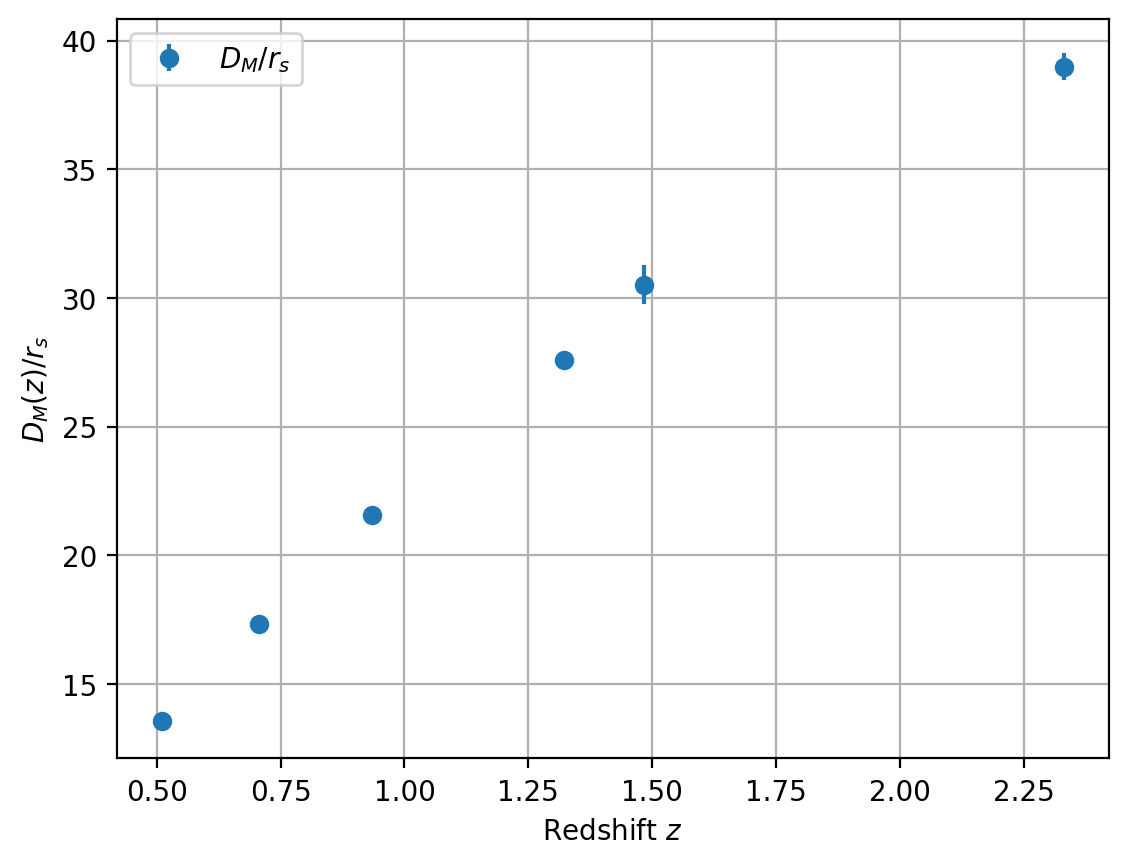

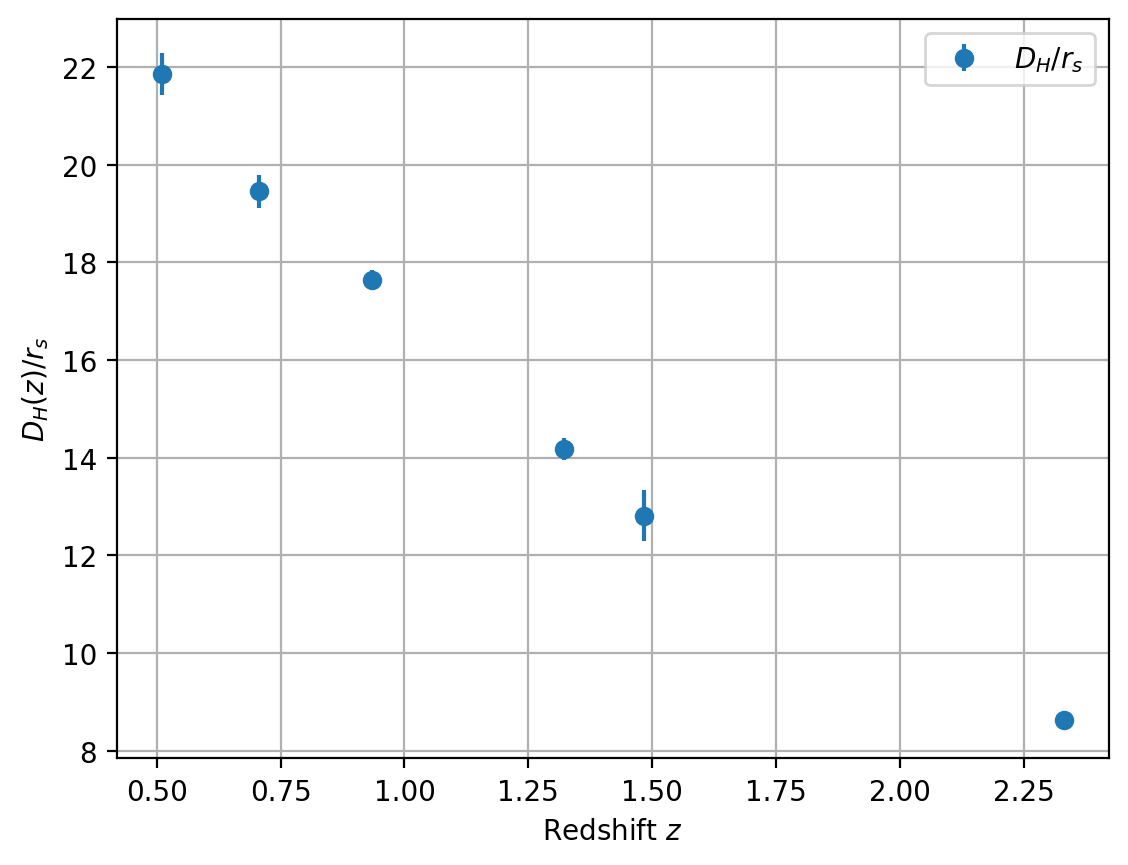

In [13]:
# Plot DESI data
# Transverse comoving distance
dm = df_val[df_val["quantity"] == "DM_over_rs"]

plt.errorbar(dm["z"], dm["value"], yerr=dm["error"], fmt='o', label=r"$D_M/r_s$")
plt.xlabel("Redshift $z$")
plt.ylabel(r"$D_M(z)/r_s$")
plt.legend()
plt.grid()
plt.show()

# Hubble distance
dh = df_val[df_val["quantity"] == "DH_over_rs"]
plt.errorbar(dh["z"], dh["value"], yerr=dh["error"], fmt='o', label=r"$D_H/r_s$")
plt.xlabel("Redshift $z$")
plt.ylabel(r"$D_H(z)/r_s$")
plt.legend()
plt.grid()
plt.show()


Dm is the trasverse comoving distance
Dh is the hubble distance

147.65512895292156


"\nfig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)\nax1.plot(z, dc_rs, label='Comoving Distance')\nax1.set_ylabel('Distance/rs')\nax1.legend()\nax2.plot(z, da_rs, label='Angular Diameter Distance')\nax2.set_ylabel('Distance/rs')\nax2.legend()\nax3.plot(z, dl_rs, label='Luminosity Distance')\nax3.set_xlabel('Redshift')\nax3.set_ylabel('Distance/rs')\nax3.legend()\nplt.tight_layout()\nplt.show()\n"

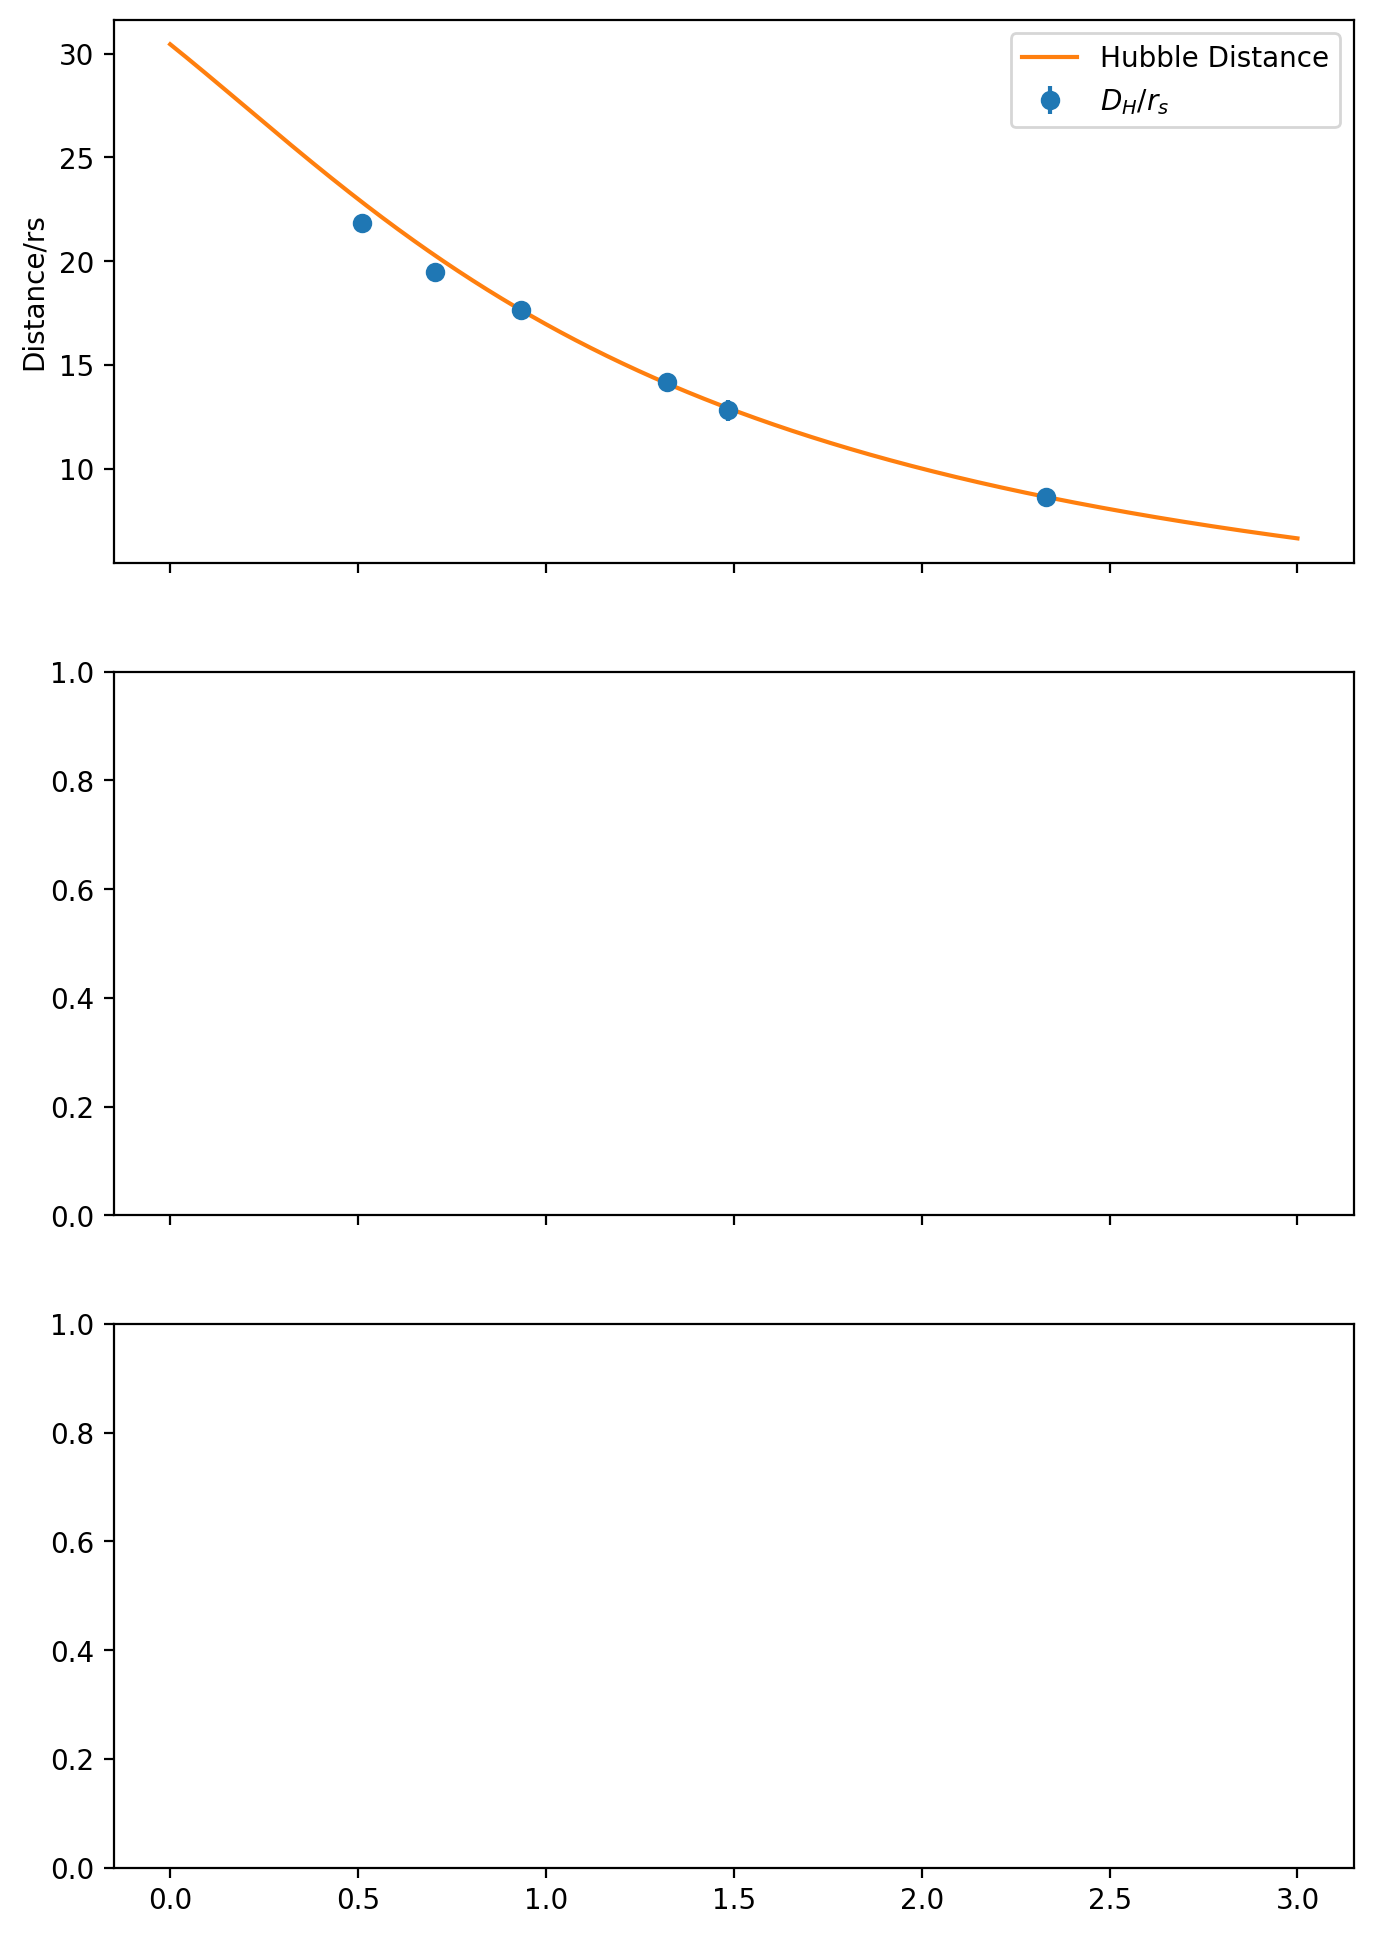

In [15]:
# compute distances
z = np.linspace(0, 3, 1000)
mean_params = samples_w0wa.getMeans()
names = samples_w0wa.getParamNames().names
# Print rdrag
rdrag = mean_params[param_names_w0wa.index('rdrag')]
print(rdrag) # in Mpc

#for i in range(len(names)):
 #   print(f"{param_names[i]}: {mean_params[i]}")

# Set up CAMB with those parameters
pars = camb.CAMBparams()
H0 = mean_params[param_names_w0wa.index('H0')]
ombh2 = mean_params[param_names_w0wa.index('ombh2')]
omch2 = mean_params[param_names_w0wa.index('omch2')]
tau = mean_params[param_names_w0wa.index('tau')]
ns = mean_params[param_names_w0wa.index('ns')]
As = mean_params[param_names_w0wa.index('As')]
# Set up the parameters for CAMB
pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau)
pars.InitPower.set_params(ns=ns, As=As)
pars.set_for_lmax(0)  

results = camb.get_results(pars)

# Initialize lists to store distances
dc_list = []
da_list = []
dl_list = []
dm_list = [] # trasverse comoving distance
dh_list = [] # Hubble distance

c = 2.99792458e5 # speed of light in km/s

for i in z:
    dc_list.append(results.comoving_radial_distance(i)/rdrag)
    da_list.append(results.angular_diameter_distance(i)/rdrag)
    dl_list.append(results.luminosity_distance(i)/rdrag)
    #dm_list.append(results.comoving_transverse_distance(i)/rdrag)
    #dh_list.append(results.hubble_distance(i)/rdrag)
    dh_list.append((c/results.hubble_parameter(i))/rdrag) # Hubble distance

# Convert lists to arrays
dc_rs = np.array(dc_list)
da_rs = np.array(da_list)
dl_rs = np.array(dl_list)
#dm_rs = np.array(dm_list)
dh_rs = np.array(dh_list)

# Plot distances vs redshift in 3 different panels
'''
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
ax1.errorbar(dm["z"], dm["value"], yerr=dm["error"], fmt='o', label=r"$D_M/r_s$")
ax1.plot(z, dc_rs, label='Trasverse Comoving Distance')
ax1.set_ylabel('Distance/rs')
ax1.legend()
'''
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
ax1.errorbar(dh["z"], dh["value"], yerr=dh["error"], fmt='o', label=r"$D_H/r_s$")
ax1.plot(z, dh_rs, label='Hubble Distance')
ax1.set_ylabel('Distance/rs')
ax1.legend()
'''
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
ax1.plot(z, dc_rs, label='Comoving Distance')
ax1.set_ylabel('Distance/rs')
ax1.legend()
ax2.plot(z, da_rs, label='Angular Diameter Distance')
ax2.set_ylabel('Distance/rs')
ax2.legend()
ax3.plot(z, dl_rs, label='Luminosity Distance')
ax3.set_xlabel('Redshift')
ax3.set_ylabel('Distance/rs')
ax3.legend()
plt.tight_layout()
plt.show()
'''